In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load dataset

In [3]:
date_columns = ['Internship_deadline', 'Earliest_Start_Date', 'Start Date', 
                'End Date', 'Start_Date']

train_merged = pd.read_csv('../data/train_merged.csv', parse_dates=date_columns)
test_merged = pd.read_csv('../data/test_merged.csv', parse_dates=date_columns)

## Load encoded data sets

In [2]:
train_merged_encoded = pd.read_csv('../data/train_merged_encoded.csv')
test_merged_encoded = pd.read_csv('../data/test_merged_encoded.csv')

## Training dataset

In [4]:
train_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted,Internship_Profile,Skills_required,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,8161,78663553,2015-01-03,2-5K,3,NaN,0,0,Voice Over Movie,NaN,...,80.4,internship,About C,JBEI,2013-08-01,2013-08-02,1,0,0,1
1,4977,7695797,2014-12-19,5-10K,2,IHFG,1,0,Social Media Marketing & Design,NaN,...,82.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
2,10271,78663092,2015-01-06,5-10K,6,NaN,0,0,Java Development,NaN,...,81.4,academic_project,NaN,JBEI,2014-11-01,2014-02-05,5,0,0,0
3,7393,7708503,2014-12-03,2-5K,1,IHFG,0,0,Fashion Curator,NaN,...,91.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
4,11125,78659782,2015-01-02,10K+,6,NaN,1,0,Business Development,"Communication,Business Development (Sales)",...,50.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0


## Test set

In [5]:
test_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Internship_Profile,Skills_required,Internship_Type,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,9341,7677714,2015-01-25,2-5K,2,IIBD,0,Content Writer,NaN,regular,...,88,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
1,6426,7696418,2015-01-21,5-10K,5,NaN,0,Android Development,NaN,regular,...,60,internship,NETWORK PLANNING,IIDB,2013-06-20,2013-08-19,2,0,0,1
2,5812,78666725,2015-01-09,10K+,5,NaN,1,Recruitment,NaN,regular,...,57,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
3,10711,7705454,2015-01-11,No Expectations,2,NaN,1,Content Development,NaN,virtual,...,74,training,NaN,JBFA,2013-06-05,2013-05-20,1,0,0,0
4,5880,7711946,2015-01-15,No Expectations,2,IHFG,1,Web Development,web development,regular,...,10,academic_project,Stock Analyst,JEJJ,2014-06-03,2015-12-01,6,0,2,1


## Class Distribution

In [6]:
train_merged_encoded.Is_Shortlisted.value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

** Class Imbalance **

## Exploratory Data Analysis

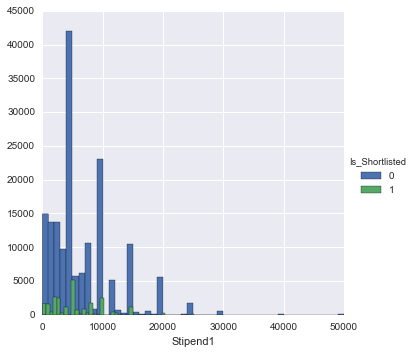

In [11]:
# stipend 1 distribution
sns.FacetGrid(train_merged, hue='Is_Shortlisted', size=5) \
    .map(plt.hist, 'Stipend1', bins=50) \
    .add_legend();

In [14]:
train_merged[train_merged.Stipend1 < 6e3].Is_Shortlisted.value_counts()

0    94215
1    15357
Name: Is_Shortlisted, dtype: int64

In [15]:
train_merged[train_merged.Stipend1 > 6e3].Is_Shortlisted.value_counts()

0    66603
1     7800
Name: Is_Shortlisted, dtype: int64

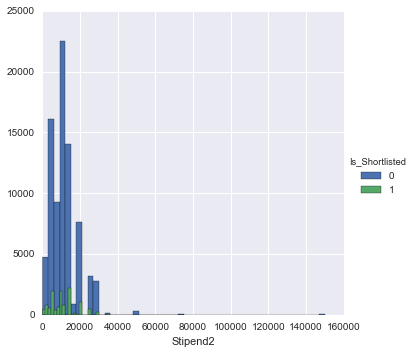

In [16]:
sns.FacetGrid(train_merged, hue='Is_Shortlisted', size=5) \
    .map(plt.hist, 'Stipend2', bins=50) \
    .add_legend();

In [19]:
train_merged[train_merged.Stipend2 > 3e4].shape

(572, 315)

## Dimensionality Reduction

In [31]:
features_to_drop = ['Earliest_Start_Date', 'Start_Date', 'Start Date', 'End Date',
            'Is_Shortlisted', 'Internship_deadline', 'PG_scale', 'UG_Scale']

features = train_merged_encoded.columns.drop(features_to_drop)

X = train_merged_encoded[features]
y = train_merged_encoded.Is_Shortlisted

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2, whiten=False)
X_pca = pca.fit_transform(X_scaled)

In [92]:
np.sum(pca.explained_variance_ratio_)

0.037309132539354771

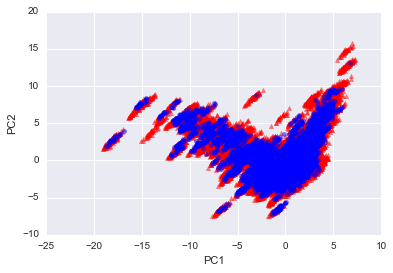

In [36]:
# plot
negative_class_labels = (y==0).values
positive_class_labels = (y==1).values

plt.scatter(X_pca[negative_class_labels, 0], X_pca[negative_class_labels, 1],
            color='red', marker='^', alpha=.5)

plt.scatter(X_pca[positive_class_labels, 0], X_pca[positive_class_labels, 1],
            color='blue', marker='o', alpha=.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

## Clustering

In [37]:
# clustering
from sklearn.cluster import KMeans

In [125]:
km = KMeans(n_clusters=13, max_iter=300, n_jobs=-1, random_state=44)

In [126]:
y_km = km.fit_predict(X_pca)

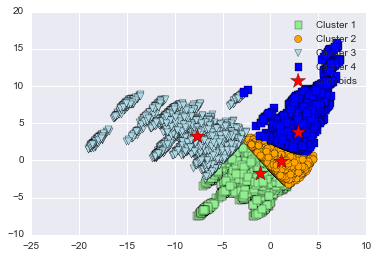

In [119]:
plt.scatter(X_pca[y_km==0, 0], X_pca[y_km==0, 1], s=50, c='lightgreen', marker='s', label='Cluster 1')
plt.scatter(X_pca[y_km==1, 0], X_pca[y_km==1, 1], s=50, c='orange', marker='o', label='Cluster 2')
plt.scatter(X_pca[y_km==2, 0], X_pca[y_km==2, 1], s=50, c='lightblue', marker='v', label='Cluster 3')
plt.scatter(X_pca[y_km==3, 0], X_pca[y_km==3, 1], s=50, c='blue', marker='s', label='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend(loc='best')
plt.show();

## Elbow method to find right number of clusters

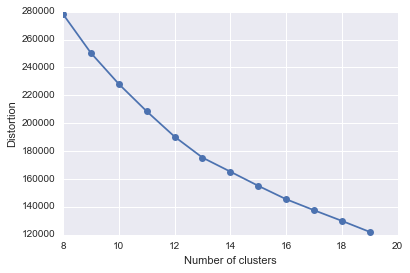

In [123]:
distortions = []

for i in range(8, 20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=43, n_jobs=-1)
    km.fit(X_pca)
    distortions.append(km.inertia_)

plt.plot(range(8, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

In [127]:
pd.crosstab(y_km, y)

Is_Shortlisted,0,1
row_0,,
0,7107,2071
1,13971,1821
2,5331,627
3,3394,433
4,31568,6300
5,6538,518
6,1893,319
7,10316,953
8,5510,471
